# A11 - Integración Montecarlo

**Aline Rockenzahn**  
**Jueves 17 octubre 2024** 

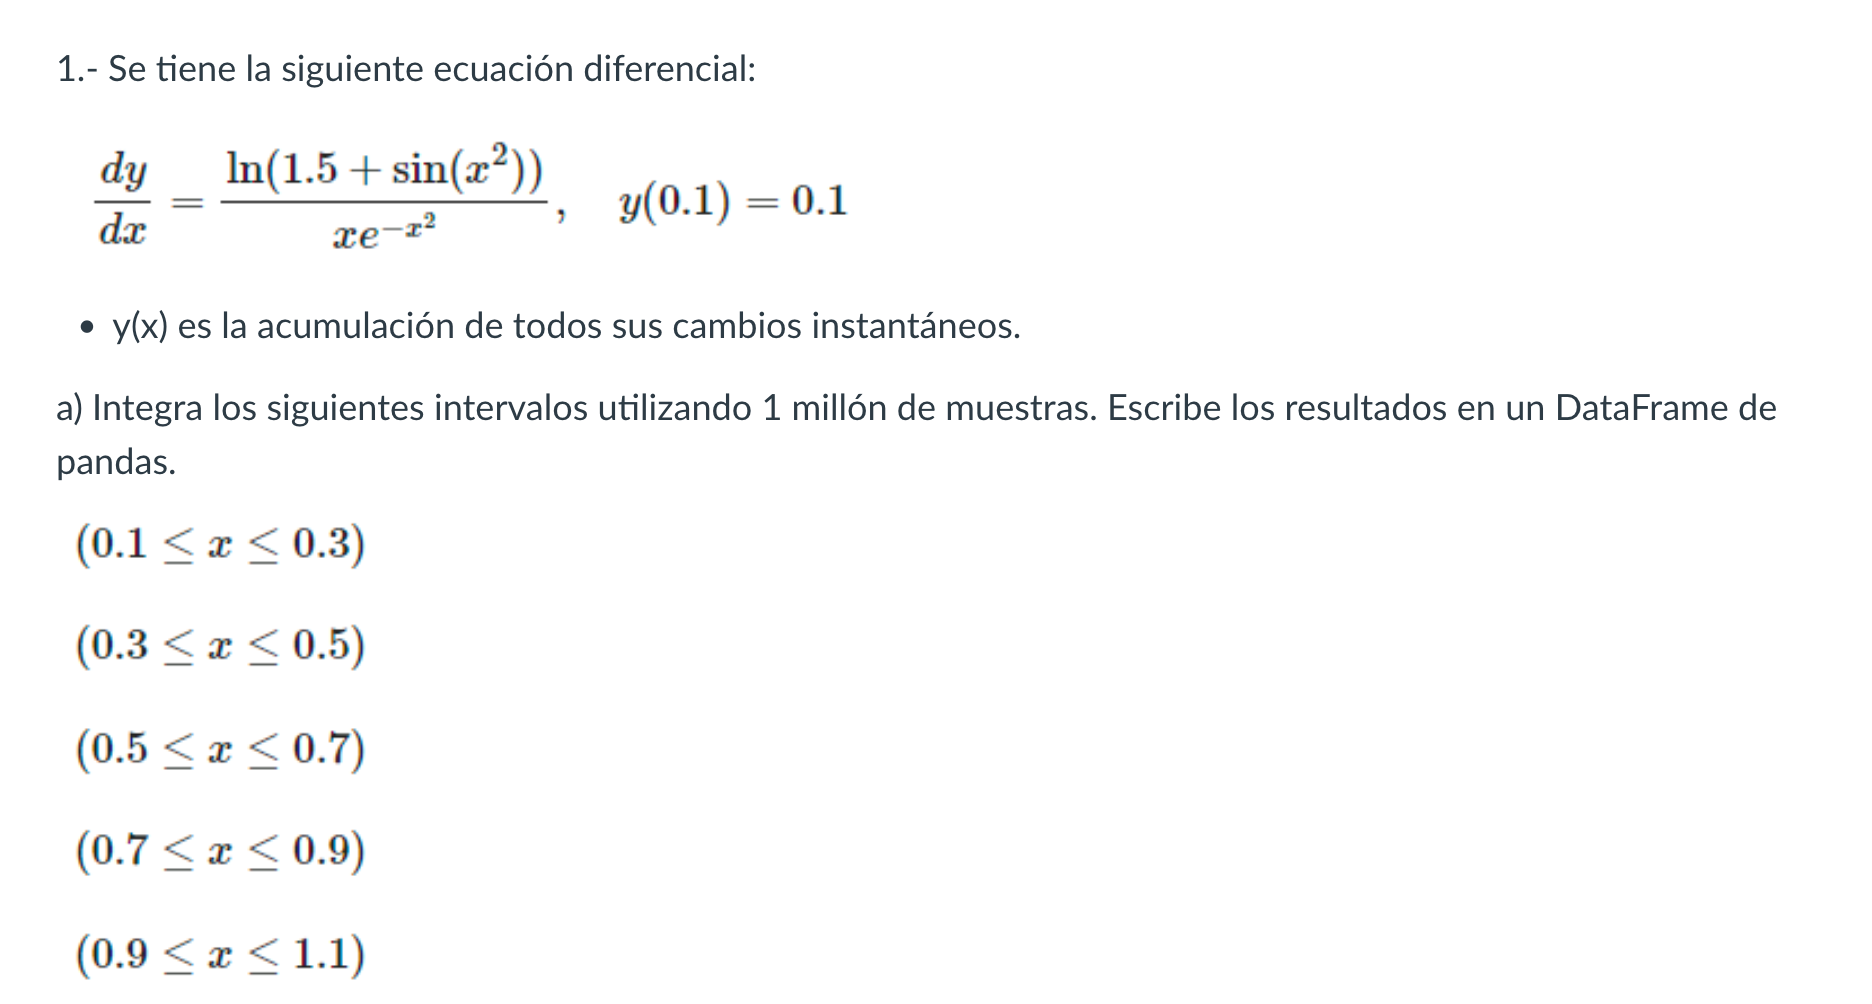

In [12]:
import numpy as np 

def montecarlo_tipo1(f, a, b, n):
    u = np.random.uniform(a, b, n)
    return np.mean(f(u))*(b-a) 

In [61]:
def ec1(x):
    return (np.log(1.5 + np.sin(x**2)))/(x*np.exp(-x**2))

int1 = montecarlo_tipo1(ec1, 0.1, 0.3, 1000000)

In [63]:
int2 = montecarlo_tipo1(ec1, 0.3, 0.5, 1000000)

In [65]:
int3 = montecarlo_tipo1(ec1, 0.5, 0.7, 1000000)

In [67]:
int4 = montecarlo_tipo1(ec1, 0.7, 0.9, 1000000)

In [69]:
int5 = montecarlo_tipo1(ec1, 0.9, 1.1, 1000000)

In [56]:
import pandas as pd  

tabla = pd.DataFrame(columns=["Rango", "Integral", "Error"])
tabla.loc[1, "Rango"] = "0.1 <= x <= 0.3"
tabla.loc[2, "Rango"] = "0.3 <= x <= 0.5"
tabla.loc[3, "Rango"] = "0.5 <= x <= 0.7"
tabla.loc[4, "Rango"] = "0.7 <= x <= 0.9"
tabla.loc[5, "Rango"] = "0.9 <= x <= 1.1"

tabla.loc[1, "Integral"] = montecarlo_tipo1(ec1, 0.1, 0.3, 1000000)
tabla.loc[2, "Integral"] = montecarlo_tipo1(ec1, 0.3, 0.5, 1000000)
tabla.loc[3, "Integral"] = montecarlo_tipo1(ec1, 0.5, 0.7, 1000000)
tabla.loc[4, "Integral"] = montecarlo_tipo1(ec1, 0.7, 0.9, 1000000)
tabla.loc[5, "Integral"] = montecarlo_tipo1(ec1, 0.9, 1.1, 1000000)

tabla 

,Rango,Integral,Error
1,0.1 <= x <= 0.3,0.489698,NaN
2,0.3 <= x <= 0.5,0.302136,NaN
3,0.5 <= x <= 0.7,0.296816,NaN
4,0.7 <= x <= 0.9,0.353377,NaN
5,0.9 <= x <= 1.1,0.465366,NaN


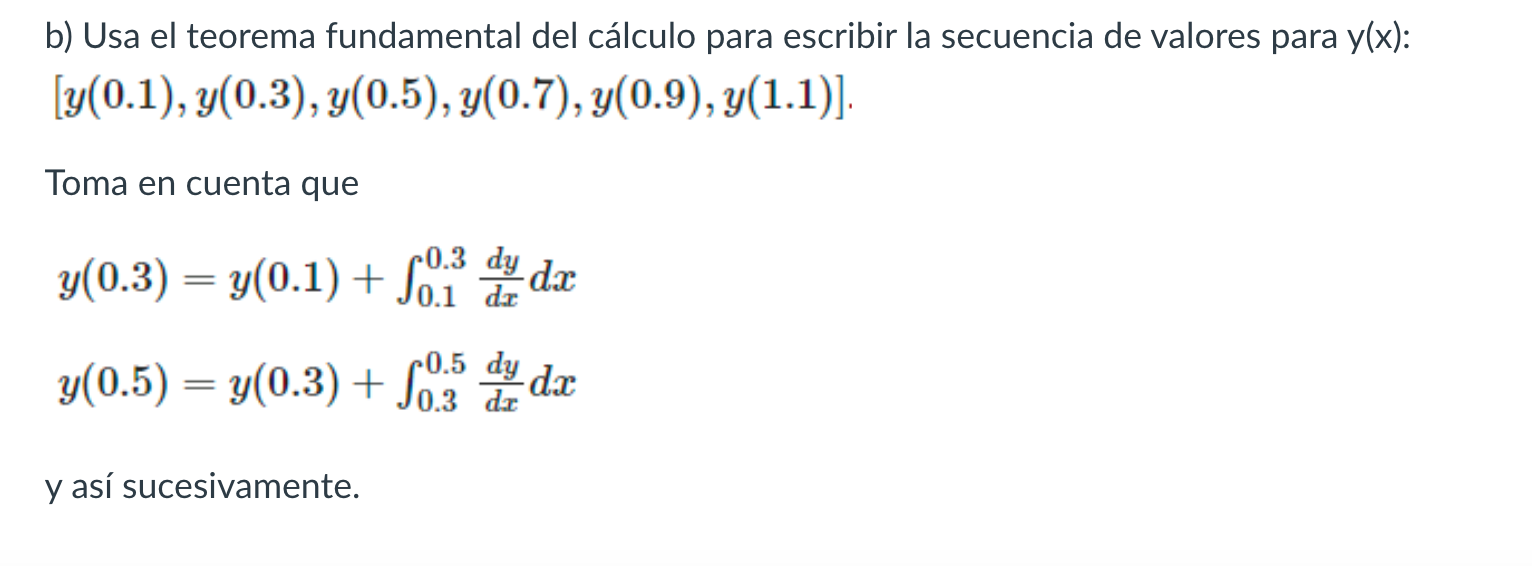

In [73]:
y0_1 = 0.1 
y0_3 = y0_1 + int1 
y0_5 = y0_3 + int2
y0_7 = y0_5 + int3 
y0_9 = y0_7 + int4 
y1_1 = y0_9 + int5 

y0_1, y0_3, y0_5, y0_7, y0_9, y1_1

(0.1,
 0.5898667914753983,
 0.8919787653525237,
 1.1887927451821076,
 1.5421771860168847,
 2.0076019430925913)

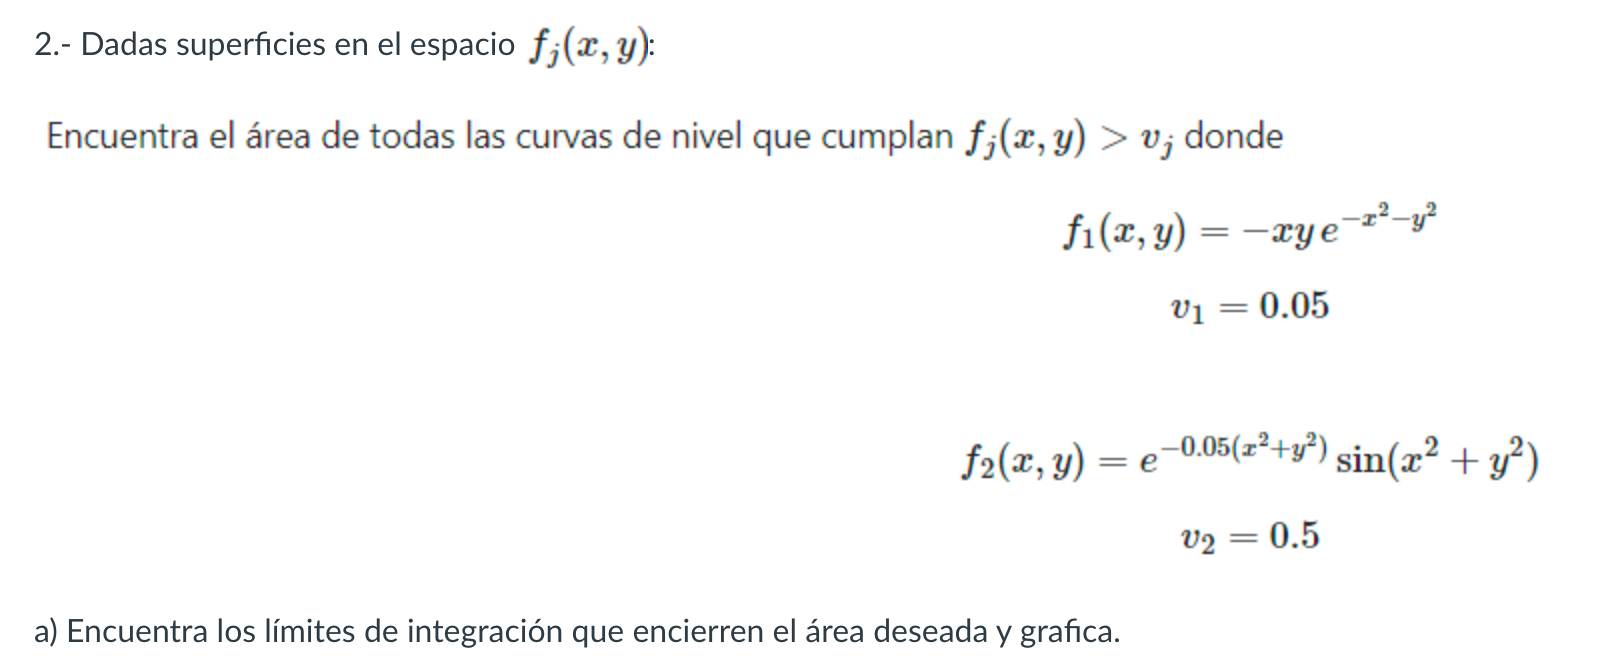

In [80]:
def func_1(x,y):
    return (-x)*y*np.exp(-x**2-y**2) > 0.05

def func_2(x,y):
    return np.exp(-0.05*(x**2+y**2))*np.sin(x**2+y**2) > 0.5 

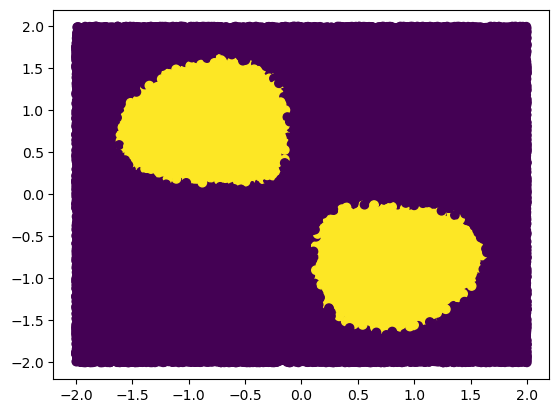

In [83]:
#limites al tanteo 
ax= -2
bx = 2
ay= -2
by = 2

n = 100000
x=np.random.uniform(ax,bx,n)
y=np.random.uniform(ay,by,n)


import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(x, y, c = func_1(x,y))

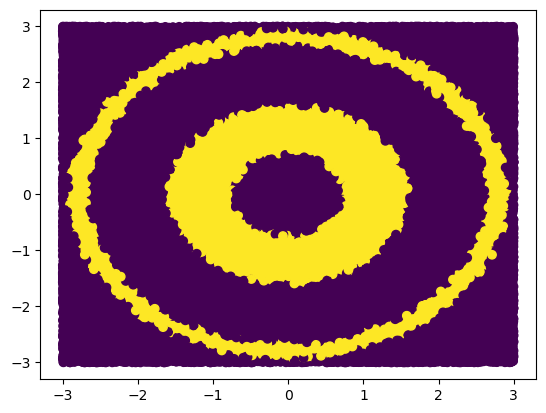

In [97]:
ax2= -3
bx2 = 3
ay2= -3
by2 = 3

n = 100000
x=np.random.uniform(ax2,bx2,n)
y=np.random.uniform(ay2,by2,n)


import matplotlib.pyplot as plt 
plt.figure()
plt.scatter(x, y, c = func_2(x,y))

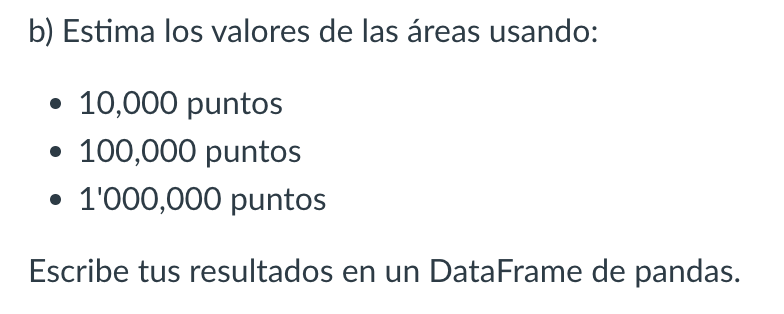

In [118]:
import numpy as np 
def montecarlo_tipo2(region, ax, bx, ay, by, n):
    x = np.random.uniform(ax, bx, n)
    y= np.random.uniform(ay, by, n)
    AR = (bx -ax)*(by-ay)
    return np.mean(region(x,y))*AR 

import pandas as pd  

tabla2 = pd.DataFrame(columns=["funcion", "n", "Área"])
tabla2.loc[1, "funcion"] = "funcion1"
tabla2.loc[1, "n"] = "10,000"
tabla2.loc[1, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 10000) 

tabla2.loc[2, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 100000) 
tabla2.loc[2, "funcion"] = "funcion1"
tabla2.loc[2, "n"] = "100,000"

tabla2.loc[3, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000) 
tabla2.loc[3, "funcion"] = "funcion1"
tabla2.loc[3, "n"] = "1000000"

tabla2.loc[4, "Área"] = montecarlo_tipo2(func_2, ax, bx, ay, by, 10000) 
tabla2.loc[4, "funcion"] = "funcion2"
tabla2.loc[4, "n"] = "10000"

tabla2.loc[5, "Área"] = montecarlo_tipo2(func_2, ax, bx, ay, by, 100000) 
tabla2.loc[5, "funcion"] = "funcion2"
tabla2.loc[5, "n"] = "100000"

tabla2.loc[6, "Área"] = montecarlo_tipo2(func_2, ax, bx, ay, by, 1000000) 
tabla2.loc[6, "funcion"] = "funcion2"
tabla2.loc[6, "n"] = "1000000"


tabla2



,funcion,n,Área
1,funcion1,"10,000",3.55
2,funcion1,"100,000",3.76
3,funcion1,1000000,3.6628
4,funcion2,10000,10.1
5,funcion2,100000,10.739
6,funcion2,1000000,10.873


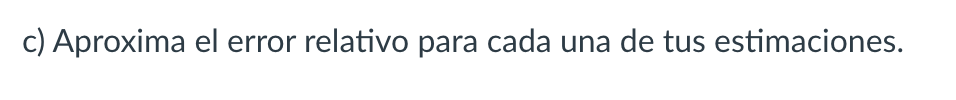

In [141]:
AR1 = (bx-ax) * (by-ay) 
AR2 = (bx2-ax2)*(by2-ay2)


Crel_fun1_10000 = np.sqrt((1- montecarlo_tipo2(func_1, ax, bx, ay, by, 10000)/AR1)/(montecarlo_tipo2(func_1, ax, bx, ay, by, 10000)/AR1))
Crel_fun1_100000 = np.sqrt((1- montecarlo_tipo2(func_1, ax, bx, ay, by, 100000)/AR1)/(montecarlo_tipo2(func_1, ax, bx, ay, by, 100000)/AR1))
Crel_fun1_1000000 = np.sqrt((1- montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000)/AR1)/(montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000)/AR1))

Erel_fun1_10000 = np.log10(Crel_fun1_10000) - np.log10(10000)/2
Erel_fun1_100000 = np.log10(Crel_fun1_100000) - np.log10(100000)/2
Erel_fun1_1000000 = np.log10(Crel_fun1_1000000) - np.log10(1000000)/2

Crel_fun2_10000 = np.sqrt((1- montecarlo_tipo2(func_2, ax, bx, ay, by, 10000)/AR2)/(montecarlo_tipo2(func_2, ax, bx, ay, by, 10000)/AR2))
Crel_fun2_100000 = np.sqrt((1- montecarlo_tipo2(func_2, ax, bx, ay, by, 100000)/AR2)/(montecarlo_tipo2(func_2, ax, bx, ay, by, 100000)/AR2))
Crel_fun2_1000000 = np.sqrt((1- montecarlo_tipo2(func_2, ax, bx, ay, by, 1000000)/AR2)/(montecarlo_tipo2(func_2, ax, bx, ay, by, 1000000)/AR2))

Erel_fun2_10000 = np.log10(Crel_fun2_10000) - np.log10(10000)/2
Erel_fun2_100000 = np.log10(Crel_fun2_100000) - np.log10(100000)/2
Erel_fun2_1000000 = np.log10(Crel_fun2_1000000) - np.log10(1000000)/2

Erel_fun1_10000, Erel_fun1_100000, Erel_fun1_1000000, Erel_fun2_10000,Erel_fun2_100000, Erel_fun2_1000000 

(-1.3030714796736462,
 -1.791908244829389,
 -2.2917807253400433,
 -1.8110788683949257,
 -2.319936517606036,
 -2.8187386604671176)

In [143]:
tabla3 = pd.DataFrame(columns=["funcion", "n", "Área","Error relativo aprox"])
tabla3.loc[1, "funcion"] = "funcion1"
tabla3.loc[1, "n"] = "10,000"
tabla3.loc[1, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 10000) 
tabla3.loc[1, "Error relativo aprox"] = Erel_fun1_10000

tabla3.loc[2, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 100000) 
tabla3.loc[2, "funcion"] = "funcion1"
tabla3.loc[2, "n"] = "100,000"
tabla3.loc[2, "Error relativo aprox"] = Erel_fun1_100000

tabla3.loc[3, "Área"] = montecarlo_tipo2(func_1, ax, bx, ay, by, 1000000) 
tabla3.loc[3, "funcion"] = "funcion1"
tabla3.loc[3, "n"] = "1000000"
tabla3.loc[3, "Error relativo aprox"] = Erel_fun1_1000000

tabla3.loc[4, "Área"] = montecarlo_tipo2(func_2, ax, bx, ay, by, 10000) 
tabla3.loc[4, "funcion"] = "funcion2"
tabla3.loc[4, "n"] = "10000"
tabla3.loc[4, "Error relativo aprox"] = Erel_fun2_10000

tabla3.loc[5, "Área"] = montecarlo_tipo2(func_2, ax, bx, ay, by, 100000) 
tabla3.loc[5, "funcion"] = "funcion2"
tabla3.loc[5, "n"] = "100000"
tabla3.loc[5, "Error relativo aprox"] = Erel_fun2_100000 


tabla3.loc[6, "Área"] = montecarlo_tipo2(func_2, ax, bx, ay, by, 1000000) 
tabla3.loc[6, "funcion"] = "funcion2"
tabla3.loc[6, "n"] = "1000000"
tabla3.loc[6, "Error relativo aprox"] = Erel_fun2_1000000


tabla3

,funcion,n,Área,Error relativo aprox
1,funcion1,"10,000",3.48,-1.303071
2,funcion1,"100,000",3.799,-1.791908
3,funcion1,1000000,3.677,-2.291781
4,funcion2,10000,11.07,-1.811079
5,funcion2,100000,10.751,-2.319937
6,funcion2,1000000,10.8924,-2.818739
